# Homework 6


In [1]:
# import common
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pylab as plt
from statsmodels.stats import weightstats
from statsmodels.stats import proportion

#### 1. Par사는 골프용품을 생산하는 대기업이다. 기존의 제품에 비해 신제품이 내구성을 향상시키면서 손색없는 비거리를 보일 수 있는 골프공의 생산에 관심이 있다. 두 제품 간의 비거리를 비교하기 위해서 각각 40개의 골프공을 추출하여 비거리를 측정하였다. 비거리의 측정 결과는 golf.csv에 수록되어 있다. 

#### (a) 기존 제품과 신제품 간의 비거리를 비교하는데 활용할 수 있는 가설을 제시하시오.

In [2]:
data_path = "./data/"

In [3]:
golf = pd.read_csv(data_path+"Golf.csv")

In [4]:
# 데이타 확인
display(golf.head()), display(golf.shape), display(golf.describe().T)

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


(40, 2)

,count,mean,std,min,25%,50%,75%,max
Current,40.0,270.275,8.752985,255.0,263.0,270.0,275.25,289.0
New,40.0,267.500,9.896904,250.0,262.0,265.0,274.50,289.0


(None, None, None)

In [5]:
# 가설제시 및 검증방법 : 두 집단 평균차이 검증 (two sample t-test)
# H0: 기존제품 비거리 = 신제품 비거리
# H1: 기존제품 비거리 <> 신제품 비거리

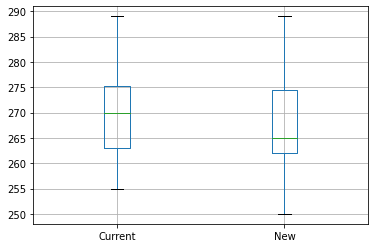

In [6]:
golf.boxplot()
plt.show()  # 정규분포 확인 및 count() 30 이상 만족 확인

#### (b) 가설검정을 수행할 수 있도록 자료를 분석하시오. P값은 얼마이며 이 결과에 대하여 Par사에 어떤 자문을 할 수 있겠는가?

In [7]:
# 1.등분산 검정 : pvalue가 0.05보다 크기 때문에 귀무가설을 기각하지 못하므로 두 집단의 분산은 같다고 가정하고 t-test
stats.bartlett(golf.Current, golf.New)

BartlettResult(statistic=0.5794722763744651, pvalue=0.4465192461066847)

In [8]:
# p-value가 0.05보다 크기 때문에 귀무가설을 기각하지 못한다. 따라서 기존제품과 신제품의 비거리는 유의한 차이가 없다.
stats.ttest_ind(golf.Current, golf.New, equal_var=True)

Ttest_indResult(statistic=1.3283615935245678, pvalue=0.18793228491854663)

In [9]:
# 검증
weightstats.ttest_ind(golf.Current,golf.New,usevar='pooled',alternative = 'two-sided')

(1.3283615935245674, 0.18793228491854672, 78.0)

#### (c) 각 모델의 모집단 평균에 대한 95% 신뢰구간은 얼마인가? 두 신뢰구간이 겹치는가? 위의 가설검정 결과와 비교하여 서술하시오.

In [10]:
# 기존제품 95% 신뢰구간
weightstats.DescrStatsW(golf.Current).tconfint_mean(alpha=0.05)

(267.47565965314044, 273.0743403468595)

In [11]:
# 신제품 95% 신뢰구간
weightstats.DescrStatsW(golf.New).tconfint_mean(alpha=0.05)

(264.3348164103898, 270.6651835896102)

In [12]:
# 두 제품의 신뢰구간은 겹치며
# 따라서 가설 검정 결과를 설명하는 신뢰구간 입니다.
# 또한 각각의 평균이 95% 신뢰구간에 포함됨이 확인됨.

#### 2. 고혈압 환자 120명을 대상으로 치료 전후의 혈압이 blood_pressure.csv에 저장되어 있다. 해당 치료가 효과가 있는지 (즉, 치료 후의 혈압이 감소했는지) 가설검정 절차를 통해 답하시오. 

In [13]:
bp = pd.read_csv(data_path+"blood_pressure.csv")

In [14]:
# 자료 확인
display(bp.head()), display(bp.shape), display(bp.describe().T)

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


(120, 5)

,count,mean,std,min,25%,50%,75%,max
patient,120.0,60.500000,34.785054,1.0,30.75,60.5,90.25,120.0
bp_before,120.0,156.450000,11.389845,138.0,147.00,154.5,164.00,185.0
bp_after,120.0,151.358333,14.177622,125.0,140.75,149.5,161.00,185.0


(None, None, None)

In [15]:
# 가설제시 및 검증방법 : 쌍체표본 t-test (paired t-test)
# diff = 치료 전 혈압 - 치료 후 혈압
# H0: diff = 0
# H1: diff < 0  (단측검정)

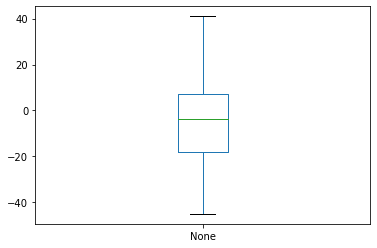

In [16]:
# boxplot을 통해 데이타의 분포가 치우치지 않음을 확인
bp.diff = bp.bp_after-bp.bp_before 
bp.diff.plot.box()
plt.show()

In [17]:
# pvalue(0.7841846942901611)가 0.05보다 크기 때문에 자료가 정규분포를 따르지 않는다는 유의한 증거가 없음
stats.shapiro(bp.diff)

(0.9926842451095581, 0.7841846942901611)

In [18]:
# 검정통계량 및 p-value 계산
stat = weightstats.DescrStatsW(bp.diff)
stat.ttest_mean(value=0, alternative="smaller")

(-3.3371870510833657, 0.0005648957322420411, 119.0)

In [19]:
# 결론
# p-value(0.0005648957322420411)는 0.05보다 작기 때문에 귀무가설을 기각. 혈압 감소가 확인 됨.

#### 3.	시카고 O’Hare 공항과 애틀란타의 Hartsfield-Jackson공항은 미국에서 가장 번잡한 공항들 중에 하나이다. 이렇게 붐비는 관계로 종종 도착과 이륙 지연이 발생한다. 예정보다 15분 지체되면 지연으로 고려된다. 시카고 O’Hare공항은 지난 달 900편 중 252편이 이륙지연되었고 애틀란타의 Hartsfield-Jackson공항은 1200편 중 312편이 이륙지연 되었다. 두 공항의 출발지연에 대한 모집단 비율의 차이가 있는지 판단하기 위해 가설검정을 진행하시오.

In [20]:
# 두 집단 비율차이 z-검정
# H0: O’Hare공항 지연비율 = Hartsfield-Jackson공항 지연비율
# H1: O’Hare공항 지연비율 <> Hartsfield-Jackson공항 지연비율 (양측검정)

In [21]:
# 가정체크 : 각각의 값이 5보다 큰것을 확인함
n1 = 900
n2 = 1200
c1 = 252
c2 = 312
p1 = c1 / n1
p2 = c2 / n2 
display(n1 * p1), display(n1 * (1- p1)), display(n2 * p2), display(n2 * (1- p1))

252.00000000000003

648.0

312.0

864.0

(None, None, None, None)

In [22]:
# 검정 통계량
proportion.proportions_ztest(count = [c1,c2], nobs = [n1,n2],  alternative = 'two-sided')

(1.0233315429559044, 0.30615111466303746)

In [23]:
# 결론
# p-value(0.30615111466303746) 가 0.05보다 크기 때문에 귀무가설 기각할 수 없음
# 따라서 모집단 비율의 차이가 있다고 할 수 없습니다.

#### 4. 올해 초 13주 동안 토요일 저녁 뉴스의 시청률이 MBC방송은 29%, KBS방송은 28%, SBS 방송은25%, 기타 방송사가 18%로 기록되었다. 토요일 저녁 방송 편성이 변경되고 난 다음에 300가구를 선정하여 시청률을 조사한 결과에 따르면 MBC 95가구, KBS 70가구, SBS 89가구, 기타 방송이 46가구를 기록하였다. 유의수준 0.05 하에서 시청률에 변경이 있었다고 할 수 있는지 통계적 판단을 하시오.

In [24]:
# 적합성 검정
# H0 : pa = 0.29, pb = 0.28, pc=0.25, pd=0.18
# H1 : pa = 0.29, pb = 0.28, pc=0.25, pd=0.18 이 아니다.

# 기대빈도가 모든 카테고리에서 5 이상
n = 300  # 300가구
pa = 0.29
pb = 0.28
pc = 0.25
pd = 0.18
xo = [95,70,89,46]
xe = [n * pa, n * pb, n * pc, n * pd]
display(xo), display(xe)

[95, 70, 89, 46]

[87.0, 84.00000000000001, 75.0, 54.0]

(None, None)

In [25]:
# 검정통계량과 p-value
stats.chisquare(xo, f_exp=xe)

Power_divergenceResult(statistic=6.867484035759902, pvalue=0.07624361547108675)

In [26]:
# 결론 : 적합성 검정을 통하여 유의수준 0.05에서 시청률에 변경이 있었다고 할 수 없음.
# p-value(0.07624361547108675)가 0.05보다 크기 때문에 귀무가설을 기각하지 못해 시청률에 변경이 있었다고 할 수 없다.